In [3]:
import cv2 as cv
import numpy as np
from matplotlib.pyplot import subplot, imshow
import matplotlib.pyplot as plt
from cv2 import createCLAHE

In [5]:
img_rgb = cv.imread('book-shelf-library-books.jpg')
lab = cv.cvtColor(img_rgb, cv.COLOR_BGR2LAB)
lab_planes = cv.split(lab)
clahe = createCLAHE(clipLimit=5)
lab[:,:,0] = clahe.apply(lab[:,:,0])
img_rgb = cv.cvtColor(lab, cv.COLOR_LAB2BGR)

from skimage import color, data, restoration
img = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d
psf = np.ones((5, 5)) / 25
img = convolve2d(img, psf, 'same')
img += 0.1 * img.std() * np.random.standard_normal(img.shape)
deconvolved_img = restoration.wiener(img, psf, 1100)

In [6]:
template = img_rgb[200:430, 480:520]
gray_template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
w, h = gray_template.shape[::-1]

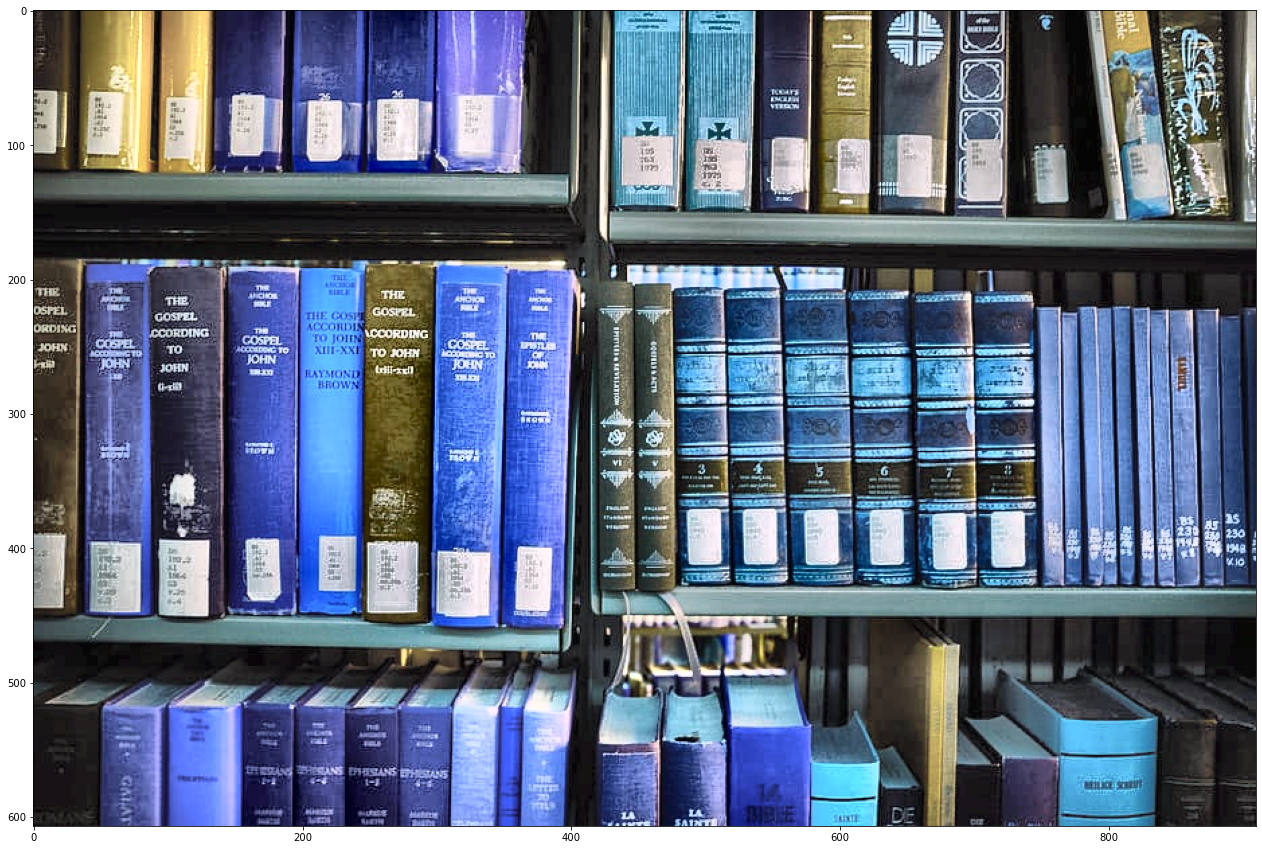

In [7]:
plt.figure(figsize = (40, 15))
plt.imshow(img_rgb)

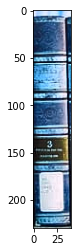

In [8]:
imshow(template)

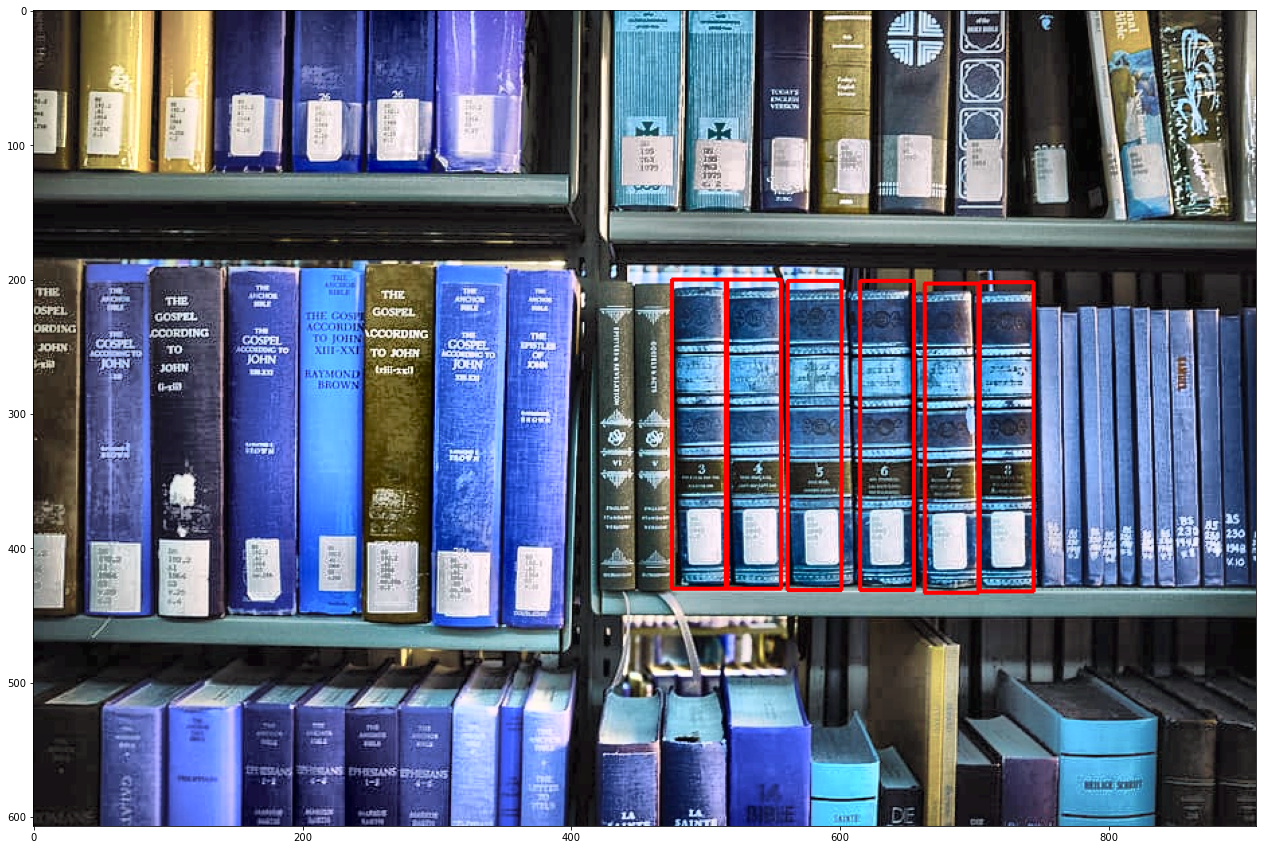

In [15]:
res = cv.matchTemplate(gray, gray_template, cv.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
locs = []
prev = (0, 0)
for i in sorted(zip(*loc[::-1])):
    if abs(i[0]-prev[0]) + abs(i[1]-prev[1])>29:
        locs.append(i)
    prev = i
for pt in locs:
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)
plt.figure(figsize=(40, 15))
plt.imshow(img_rgb)

In [10]:
locs 

[(475, 200), (516, 200), (561, 201), (615, 201), (663, 203), (704, 202)]

In [ ]:
# CAN BE CONCLUDED THAT CCOEFF WORKS BEST FOR IMAGES WITH BRIGHT PATCHES (CCORR FAILS)
# ALSO, OPENCV IS MORE ROBUST AS IT CAN HANDLE TRUECOLOR IMAGES ALSO

In [ ]:
# NEXT, ADD NOISE TO TEMPLATE AND MAKE IT BLURRED